# Setup and Additional Functions

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, csv, math
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

Confidence Ellipse code from https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# Part 1.1: Single Gaussian

In [3]:
data = pd.read_csv('data.csv', header = None, names = ['X','Y'])
data = data.to_numpy()
data

array([[ 37.39461895,  31.04873877],
       [ -8.16834554, -12.04439852],
       [ 24.30362862,  22.20918302],
       ...,
       [ 28.15031603,  29.59509463],
       [ 35.55857318,  35.29055002],
       [ 23.16939613,  22.22921506]])

To calculate the single Gaussian distribution, we calculate the mean and covariance matrix, and return the probabilities each point is near the center of the cluster.

In [4]:
def single_gauss(data):
    mean = np.mean(data, axis = 0)
    cov = np.cov(np.transpose(data))
    const = 1.0 / math.sqrt(math.pow(2 * math.pi, 3) * np.linalg.det(cov))
    probs = []
    for x in data:
        matrix_bs = math.exp(np.matmul(np.matmul(np.transpose(x-mean), np.linalg.inv(cov)), (x-mean)) / -2)
        probs.append(const * matrix_bs)
    return probs
        
probs = single_gauss(data)
probs

[0.00018251834893927993,
 0.00010161669593134423,
 0.0007971772791362234,
 0.0009425703970715218,
 0.00024189139382982034,
 0.00036580473019651784,
 0.0004653727672698966,
 0.00043507527885342564,
 0.0009216640611172386,
 0.0009162564901588846,
 0.0002757964927156208,
 0.0001273977617134622,
 4.426672488113039e-05,
 0.00016455047479988177,
 0.0004529811172528324,
 0.0005247542636341741,
 0.0005928662971973804,
 0.0009423633714528386,
 0.0004920105127531629,
 0.0009135281100916209,
 3.4041264603518975e-05,
 0.0008620398607635919,
 0.0007265028880183073,
 0.0006730976699111082,
 0.0006389000219228277,
 0.0005952025118237956,
 0.0004918086515521127,
 0.00034948924076746583,
 0.0006047762616430463,
 0.0008966041746224959,
 0.00021723587688538378,
 0.000638928390392821,
 0.0008454293943713594,
 0.00041273803790669526,
 0.000525317829669181,
 8.222116966639847e-05,
 6.829530955620865e-05,
 0.0003444626067186558,
 0.00045365135746459743,
 0.0007851475368917785,
 0.0005003859387192131,
 0.0008

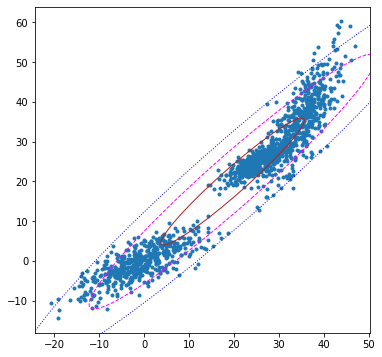

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
x, y = data[:,0], data[:,1]
ax.scatter(x, y, marker = ".")
confidence_ellipse(x, y, ax, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')
plt.show()

# Part 1.2 Gaussian Mixture Models